# Maryland Crime Data Analysis Project  
**Author:** Aibarna Singh Basnet  
**Time Period Covered:** 1975 – 2020  

---

## 📌 Project Introduction

This project involves a comprehensive data analysis of historical crime data provided by the **Maryland Department of Public Safety and Correctional Services**. As a data analyst, my role is to uncover actionable insights that will help the department improve public safety, allocate resources more efficiently, and inform strategic crime reduction initiatives.

### 🎯 Objective

The primary goal is to analyze crime data across a 45-year span to:
- Understand long-term crime trends.
- Examine the distribution and evolution of crime types.
- Identify geographical hotspots.
- Evaluate the relationship between crime and population changes.
- Measure the rate of change across different crime categories.
- Deliver insights that inform crime prevention strategies.

---

## 🧠 Business Problem

The Maryland Department of Public Safety has set a target to **reduce statewide crime rates by 10% over the next five years**. To support this initiative, the department requires a deep, data-driven understanding of:

- How crime patterns have changed over time.
- Which jurisdictions are most affected.
- The demographic and geographic factors influencing crime.
- Which previous interventions have been effective or ineffective.

This project aims to equip policymakers with a clear, evidence-based foundation for future decision-making.

---

## 🔍 Challenge Questions Addressed

1. **Trend Analysis**  
   *How have overall crime rates evolved from 1975 to 2020?*  
   Identify any consistent upward or downward trends.

2. **Crime Distribution**  
   *What are the most common types of crimes, and how has their frequency changed?*

3. **Geographical Analysis**  
   *Which jurisdictions consistently report high or low crime rates compared to the state average?*

4. **Population Correlation**  
   *Is there a correlation between population size and crime rates?*

5. **Crime Rate Changes**  
   *Which crime categories have experienced the most significant increases or decreases?*

6. **Crime Hotspots**  
   *Identify key jurisdictions that may require targeted interventions.*

7. **Bonus – Dashboard for Management**  
   *Design a visual report that summarizes key metrics and insights for executive decision-makers.*

---

Throughout the notebook, you’ll find visualizations, statistical summaries, and interpretative commentary that work together to uncover meaningful insights from the Maryland crime dataset.

Let’s begin.


In [1]:
# 📦 Importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Configure pandas to display all columns
pd.set_option('display.max_columns', None)


## 🗂️ Loading the Dataset
We'll begin by loading the Maryland crime dataset and performing a preliminary inspection.


In [2]:
# Load the dataset (update the path as needed for your local setup)
df = pd.read_csv('C:\\Users\\aibar\\Desktop\\portfolio projects data\\MD_Crime_Data.csv')

# View the first few rows
df.head()

,JURISDICTION,YEAR,POPULATION,MURDER,RAPE,ROBBERY,AGG. ASSAULT,B & E,LARCENY THEFT,M/V THEFT,GRAND TOTAL,PERCENT CHANGE,VIOLENT CRIME TOTAL,VIOLENT CRIME PERCENT,VIOLENT CRIME PERCENT CHANGE,PROPERTY CRIME TOTALS,PROPERTY CRIME PERCENT,PROPERTY CRIME PERCENT CHANGE,"OVERALL CRIME RATE PER 100,000 PEOPLE","OVERALL PERCENT CHANGE PER 100,000 PEOPLE","VIOLENT CRIME RATE PER 100,000 PEOPLE","VIOLENT CRIME RATE PERCENT CHANGE PER 100,000 PEOPLE","PROPERTY CRIME RATE PER 100,000 PEOPLE","PROPERTY CRIME RATE PERCENT CHANGE PER 100,000 PEOPLE","MURDER PER 100,000 PEOPLE","RAPE PER 100,000 PEOPLE","ROBBERY PER 100,000 PEOPLE","AGG. ASSAULT PER 100,000 PEOPLE","B & E PER 100,000 PEOPLE","LARCENY THEFT PER 100,000 PEOPLE","M/V THEFT PER 100,000 PEOPLE","MURDER RATE PERCENT CHANGE PER 100,000 PEOPLE","RAPE RATE PERCENT CHANGE PER 100,000 PEOPLE","ROBBERY RATE PERCENT CHANGE PER 100,000 PEOPLE","AGG. ASSAULT RATE PERCENT CHANGE PER 100,000 PEOPLE","B & E RATE PERCENT CHANGE PER 100,000 PEOPLE","LARCENY THEFT RATE PERCENT CHANGE PER 100,000 PEOPLE","M/V THEFT RATE PERCENT CHANGE PER 100,000 PEOPLE"
0,Allegany County,1975,79655,3,5,20,114,669,1425,93,2329,NaN,142,6.1,NaN,2187,93.9,NaN,2923.9,NaN,178.3,NaN,2745.6,NaN,3.8,6.3,25.1,143.1,839.9,1789.0,116.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Allegany County,1976,83923,2,2,24,59,581,1384,73,2125,-8.8,87,4.1,-38.7,2038,95.9,-6.8,2532.1,-13.4,103.7,-41.8,2428.4,-11.6,2.4,2.4,28.6,70.3,692.3,1649.1,87.0,-36.7,-62.0,13.9,-50.9,-17.6,-7.8,-25.5
2,Allegany County,1977,82102,3,7,32,85,592,1390,102,2211,4.0,127,5.7,46.0,2084,94.3,2.3,2693.0,6.4,154.7,49.2,2538.3,4.5,3.7,8.5,39.0,103.5,721.1,1693.0,124.2,53.3,257.8,36.3,47.3,4.2,2.7,42.8
3,Allegany County,1978,79966,1,2,18,81,539,1390,100,2131,-3.6,102,4.8,-19.7,2029,95.2,-2.6,2664.9,-1.0,127.6,-17.5,2537.3,0.0,1.3,2.5,22.5,101.3,674.0,1738.2,125.1,-65.8,-70.7,-42.2,-2.2,-6.5,2.7,0.7
4,Allegany County,1979,79721,1,7,18,84,502,1611,99,2322,9.0,110,4.7,7.8,2212,95.3,9.0,2912.7,9.3,138.0,8.2,2774.7,9.4,1.3,8.8,22.6,105.4,629.7,2020.8,124.2,0.3,251.1,0.3,4.0,-6.6,16.3,-0.7


In [28]:
# Check the shape of the dataset
print("Dataset Shape:\n \n", df.shape, "\n")

print("==============================================")

# Display column names
print("\nColumns:\n \n", df.columns.tolist(), "\n")

print("==============================================")

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape:
 
 (1104, 38) 


Columns:
 
 ['JURISDICTION', 'YEAR', 'POPULATION', 'MURDER', 'RAPE', 'ROBBERY', 'AGG. ASSAULT', 'B & E', 'LARCENY THEFT', 'M/V THEFT', 'GRAND TOTAL', 'PERCENT CHANGE', 'VIOLENT CRIME TOTAL', 'VIOLENT CRIME PERCENT', 'VIOLENT CRIME PERCENT CHANGE', 'PROPERTY CRIME TOTALS', 'PROPERTY CRIME PERCENT', 'PROPERTY CRIME PERCENT CHANGE', 'OVERALL CRIME RATE PER 100,000 PEOPLE', 'OVERALL PERCENT CHANGE PER 100,000 PEOPLE', 'VIOLENT CRIME RATE PER 100,000 PEOPLE', 'VIOLENT CRIME RATE PERCENT CHANGE PER 100,000 PEOPLE', 'PROPERTY CRIME RATE PER 100,000 PEOPLE', 'PROPERTY CRIME RATE PERCENT CHANGE PER 100,000 PEOPLE', 'MURDER PER 100,000 PEOPLE', 'RAPE PER 100,000 PEOPLE', 'ROBBERY PER 100,000 PEOPLE', 'AGG. ASSAULT PER 100,000 PEOPLE', 'B & E PER 100,000 PEOPLE', 'LARCENY THEFT PER 100,000 PEOPLE', 'M/V THEFT PER 100,000 PEOPLE', 'MURDER  RATE PERCENT CHANGE PER 100,000 PEOPLE', 'RAPE RATE PERCENT CHANGE PER 100,000 PEOPLE', 'ROBBERY RATE PERCENT CHANGE PER 100,000

### 📌 Observations on Percent Change Columns

- All percent change columns contain `NaN` values for the first year in each jurisdiction.
- This is expected behavior because percent change requires a previous year's value for comparison.
- These rows are still useful as they represent the baseline crime rate for each jurisdiction and **should not be removed**.


## 📈 Trend Analysis: Statewide Crime Rates (1975–2020)

We'll analyze how the overall crime rates have changed in Maryland over time.


In [4]:
# Group by year to compute total population and total crimes
statewide_df = df.groupby("YEAR").agg({
    "POPULATION": "sum",
    "GRAND TOTAL": "sum"
}).reset_index()

# Calculate crime rate per 100,000 people
statewide_df["CRIME RATE PER 100,000"] = (statewide_df["GRAND TOTAL"] / statewide_df["POPULATION"]) * 100000

# Smooth the trend with a 3-year rolling average
statewide_df["Smoothed"] = statewide_df["CRIME RATE PER 100,000"].rolling(window=3).mean()

# Year-over-year percent change in crime rate
statewide_df["YOY_%CHANGE"] = statewide_df["CRIME RATE PER 100,000"].pct_change() * 100

statewide_df.head()


,YEAR,POPULATION,GRAND TOTAL,"CRIME RATE PER 100,000",Smoothed,YOY_%CHANGE
0,1975,4098000,241894,5902.733041,NaN,NaN
1,1976,4144000,234137,5650.024131,NaN,-4.281219
2,1977,4139000,235312,5685.237980,5745.998384,0.623251
3,1978,4143000,240095,5795.196717,5710.152943,1.934110
4,1979,4149000,260490,6278.380333,5919.605010,8.337657


### 📊 Visualization: Crime Rate Trends Over Time


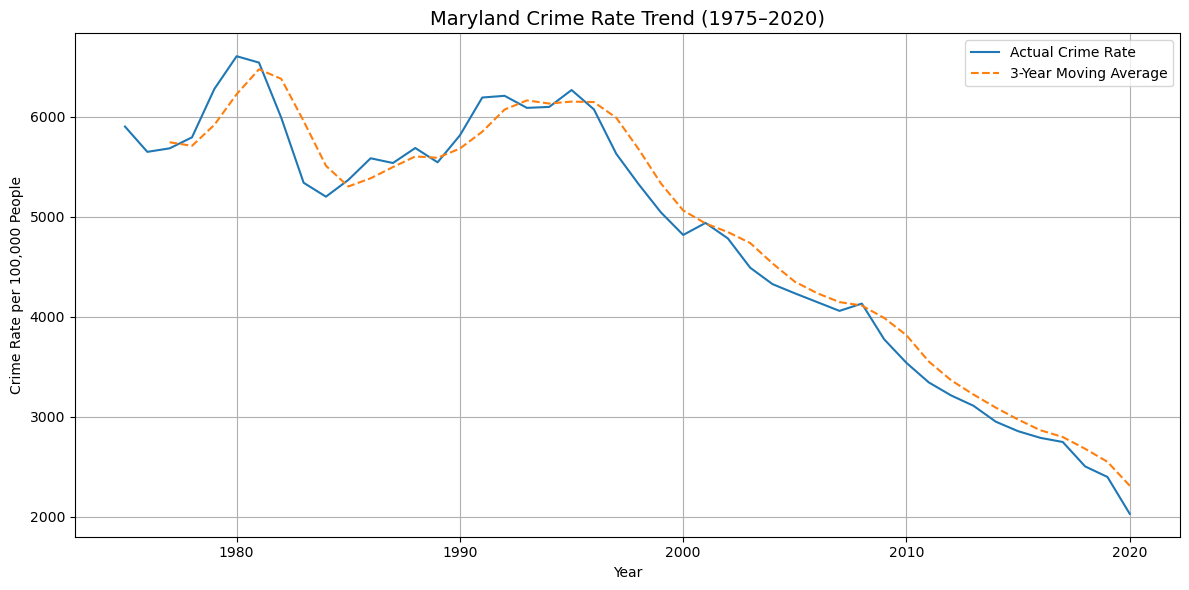

In [5]:
# Plot: Actual crime rate and smoothed trend
plt.figure(figsize=(12, 6))
plt.plot(statewide_df["YEAR"], statewide_df["CRIME RATE PER 100,000"], label="Actual Crime Rate")
plt.plot(statewide_df["YEAR"], statewide_df["Smoothed"], label="3-Year Moving Average", linestyle="--")
plt.title("Maryland Crime Rate Trend (1975–2020)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Crime Rate per 100,000 People")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

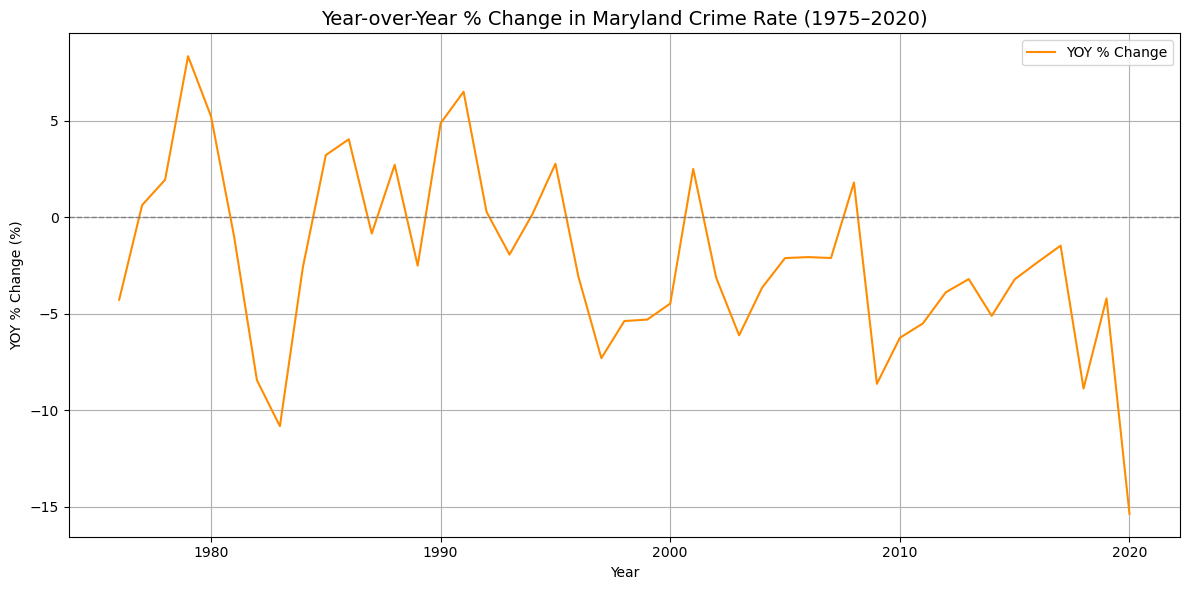

In [6]:
# Plot: YOY % change in crime rate
plt.figure(figsize=(12, 6))
plt.plot(statewide_df["YEAR"], statewide_df["YOY_%CHANGE"], color='darkorange', label="YOY % Change")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title("Year-over-Year % Change in Maryland Crime Rate (1975–2020)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("YOY % Change (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 📊 Trend Analysis: Maryland Crime Rates (1975–2020)

The overall crime rate in Maryland has shown a **significant long-term downward trend** from 1975 to 2020:

- 📉 **Crime Rate Decline:**  
  The crime rate peaked in the early 1980s and mid-1990s, reaching above **6,500 crimes per 100,000 people**, but has **steadily declined since then**, dropping to around **2,000 by 2020**. This represents an approximate **70% reduction** over the 45-year period.

- 🔁 **Year-over-Year Volatility:**  
  The **YOY % change plot** reveals high volatility during the earlier decades. Some years saw crime increases of over **+8%**, while others experienced sharp declines (as much as **-15%**, notably around 2020). The 1990s had frequent spikes, whereas post-2000s showed **more consistent declines**.

- 📉 **Recent Improvements:**  
  From **2000 onwards**, the year-over-year change remained mostly negative, indicating that the state made **consistent improvements in reducing crime rates** during the last two decades.

📌 **Conclusion:**  
Maryland’s historical data shows that crime reduction strategies and law enforcement interventions—especially since the late 1990s—have been effective. However, the early volatility suggests the importance of maintaining stability and investing in long-term crime prevention initiatives.


## 📊 Crime Distribution Analysis

### What are the most common types of crimes committed in Maryland over the years?
### How has the distribution of different crime types changed over time?

This section explores how the share of various crime types — such as murder, rape, robbery, assault, burglary, larceny, and motor vehicle theft — has shifted over the decades. It helps us understand which types of crime dominate the state’s crime profile and how that has evolved from 1975 to 2020.


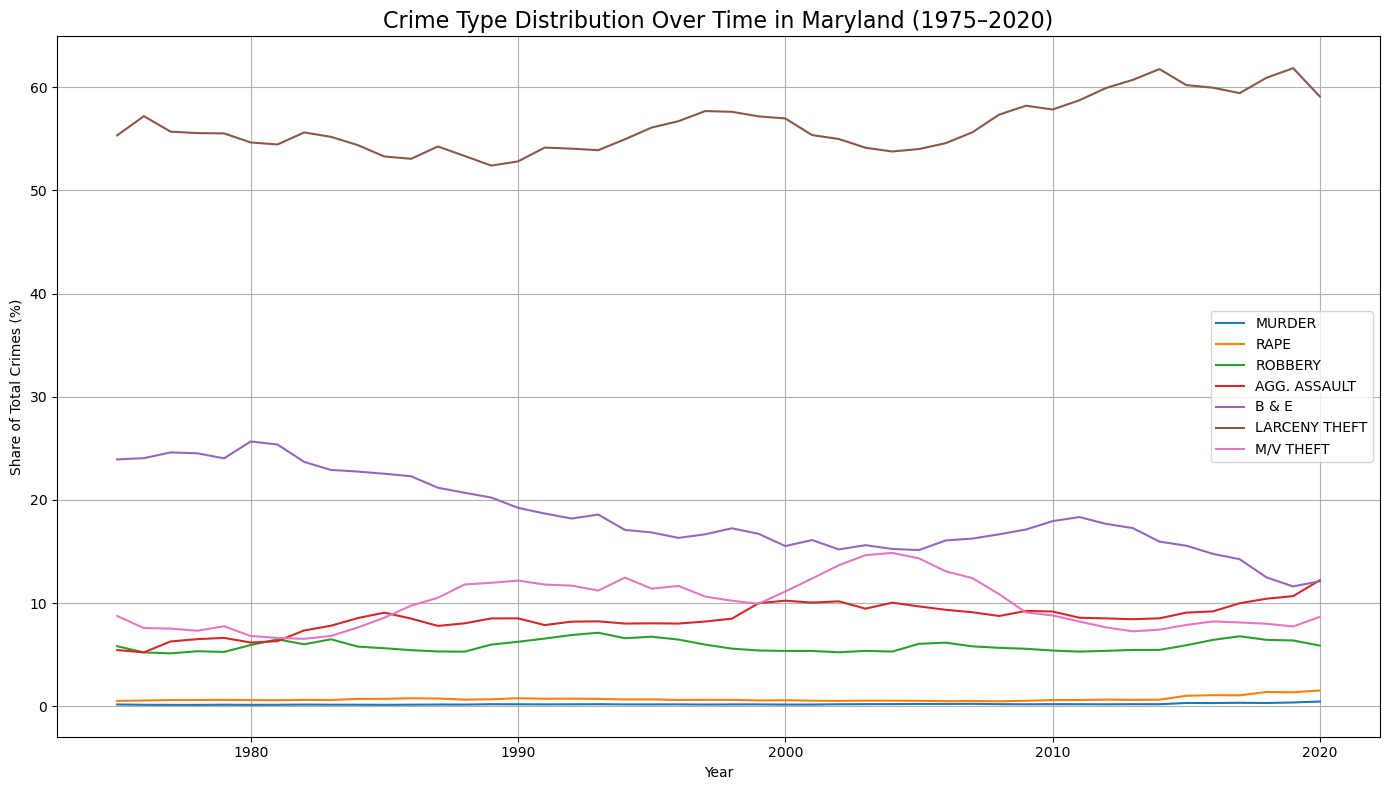

In [7]:
# Define crime columns of interest
crime_columns = ["MURDER", "RAPE", "ROBBERY", "AGG. ASSAULT", "B & E", "LARCENY THEFT", "M/V THEFT"]

# Aggregate crime counts per year for each category
yearly_crime_totals = df.groupby("YEAR")[crime_columns].sum().reset_index()

# Calculate total number of crimes each year
yearly_crime_totals["TOTAL_CRIMES"] = yearly_crime_totals[crime_columns].sum(axis=1)

# Calculate each crime type as a percentage of total crimes
for col in crime_columns:
    yearly_crime_totals[col + "_PERCENT"] = (yearly_crime_totals[col] / yearly_crime_totals["TOTAL_CRIMES"]) * 100

# Plot percentage distribution of crime types over time
plt.figure(figsize=(14, 8))
for col in crime_columns:
    plt.plot(yearly_crime_totals["YEAR"], yearly_crime_totals[col + "_PERCENT"], label=col)

plt.title("Crime Type Distribution Over Time in Maryland (1975–2020)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Share of Total Crimes (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Based on the crime type distribution plot for Maryland from 1975-2020, here's my analysis:

### 📊 Crime Distribution Analysis: Maryland Crime Types (1975–2020)

**Most Common Crime Types:**
The data reveals that **Larceny Theft** has consistently been the dominant crime category throughout the entire period:
- 🥇 **Larceny Theft (brown line):** Represents the largest share, comprising **50-62%** of all crimes across the decades. This crime type shows a notable **upward trend**, rising from around 55% in the 1970s to over 60% by 2020.
- 🥈 **Motor Vehicle Theft (purple line):** The second most common crime, accounting for **15-25%** of total crimes, though it shows a **declining trend** from peaks of ~25% in the early 1980s to around 12% by 2020.

**How Distribution Has Changed Over Time:**

📈 **Increasing Trends:**
- **Larceny Theft:** Steady increase from ~55% to ~62%, indicating this property crime has become more prevalent relative to other crimes
- **Rape:** Gradual increase from ~1% to ~2%, likely reflecting improved reporting mechanisms

📉 **Decreasing Trends:**
- **Motor Vehicle Theft:** Significant decline from ~25% to ~12%, possibly due to improved vehicle security technology
- **Burglary & Entry:** Decreased from ~10% in the 1980s to ~8% by 2020

📊 **Relatively Stable Categories:**
- **Aggravated Assault:** Maintained around 8-10% throughout the period
- **Robbery:** Consistently around 5-7% with slight fluctuations
- **Murder:** Remained consistently low at <1% across all years

**Key Insights:**
The shift toward **property crimes** (especially larceny theft) dominating the crime landscape, while **violent crimes** like motor vehicle theft and burglary have declined, suggests that Maryland's crime profile has evolved toward less violent offenses over the past four decades. This could reflect both improved law enforcement strategies for violent crimes and changing societal patterns in criminal behavior.

## 🌍 Crime Rate by Jurisdiction

### Which jurisdictions have the highest and lowest crime rates?
### How do these compare to the state average?

This section compares the average crime rate per 100,000 residents across different Maryland jurisdictions. It also visualizes how far each jurisdiction deviates from the state average crime rate.


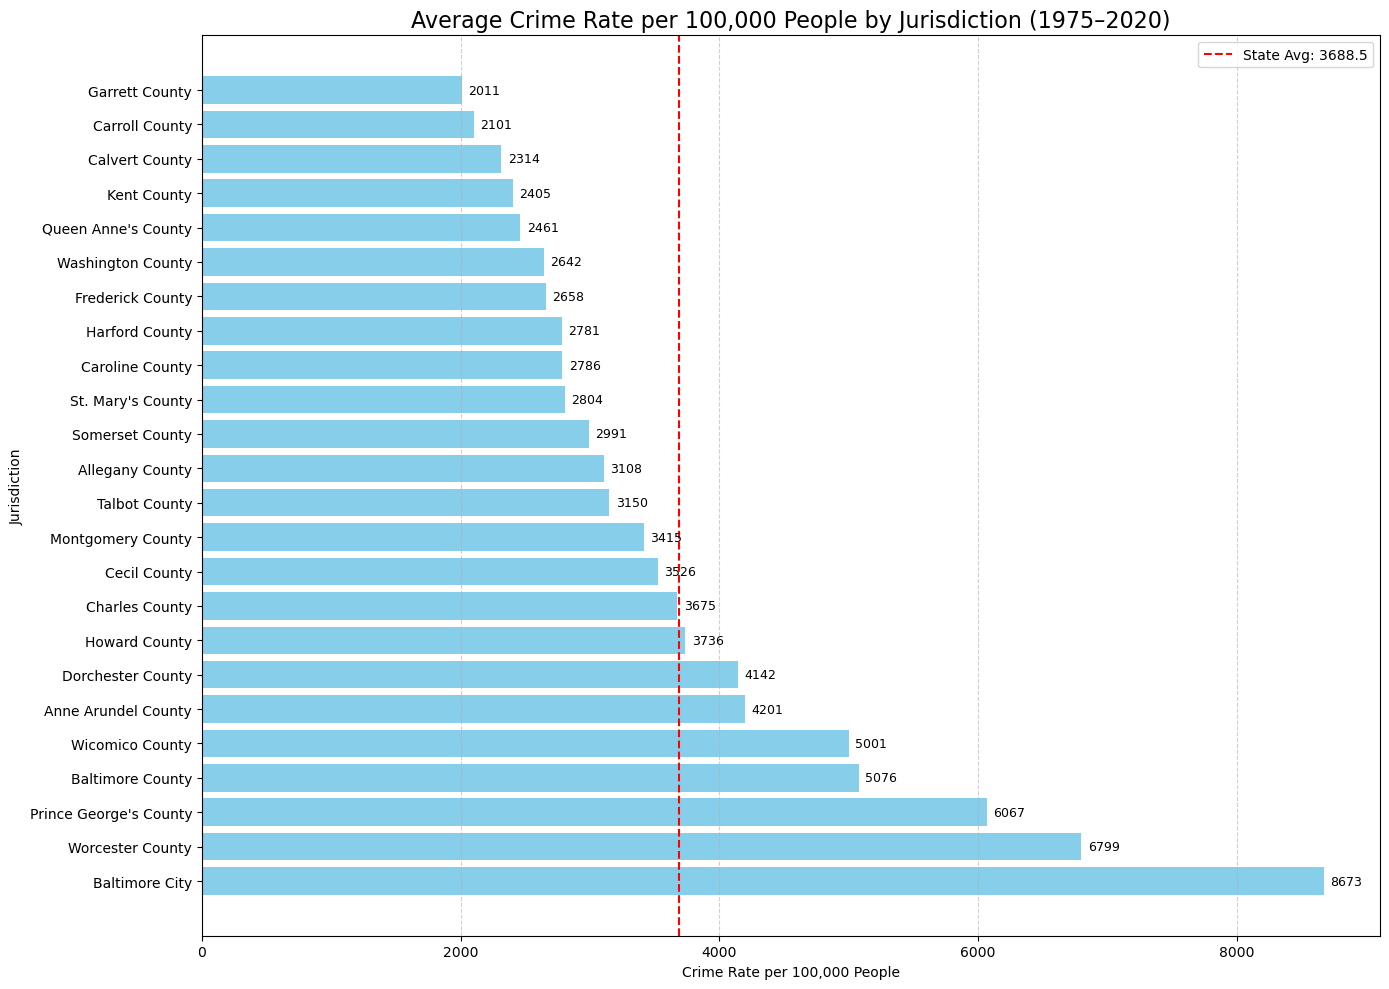

In [8]:
# Calculate average crime rate per jurisdiction
jurisdiction_crime = df.groupby("JURISDICTION")["OVERALL CRIME RATE PER 100,000 PEOPLE"].mean().reset_index()

# Statewide average crime rate
state_average = jurisdiction_crime["OVERALL CRIME RATE PER 100,000 PEOPLE"].mean()

# Sort for plotting
jurisdiction_crime_sorted = jurisdiction_crime.sort_values(by="OVERALL CRIME RATE PER 100,000 PEOPLE", ascending=False)

# Plot
plt.figure(figsize=(14, 10))
bars = plt.barh(jurisdiction_crime_sorted["JURISDICTION"],
                jurisdiction_crime_sorted["OVERALL CRIME RATE PER 100,000 PEOPLE"],
                color='skyblue')

# Draw vertical line for state average
plt.axvline(state_average, color='red', linestyle='--', label=f"State Avg: {state_average:.1f}")

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 50, bar.get_y() + bar.get_height()/2, f"{width:.0f}", va='center', fontsize=9)

plt.title("Average Crime Rate per 100,000 People by Jurisdiction (1975–2020)", fontsize=16)
plt.xlabel("Crime Rate per 100,000 People")
plt.ylabel("Jurisdiction")
plt.legend()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 📊 Geographical Crime Analysis: Maryland Jurisdictions (1975–2020)

**Highest Crime Rate Jurisdictions:**
The data reveals significant variation in crime rates across Maryland's jurisdictions:

🔴 **Above State Average (3,688.5 per 100,000):**
- 🥇 **Baltimore City:** 8,673 per 100,000 - **135% above state average** and by far the highest crime rate
- 🥈 **Worcester County:** 6,799 per 100,000 - **84% above state average**
- 🥉 **Prince George's County:** 6,067 per 100,000 - **65% above state average**
- **Baltimore County:** 5,076 per 100,000 - **38% above state average**
- **Wicomico County:** 5,001 per 100,000 - **36% above state average**

**Lowest Crime Rate Jurisdictions:**

🟢 **Significantly Below State Average:**
- 🏆 **Garrett County:** 2,011 per 100,000 - **45% below state average** (lowest)
- **Carroll County:** 2,101 per 100,000 - **43% below state average**
- **Calvert County:** 2,314 per 100,000 - **37% below state average**
- **Kent County:** 2,405 per 100,000 - **35% below state average**
- **Queen Anne's County:** 2,461 per 100,000 - **33% below state average**

**Key Geographic Patterns:**

📍 **Urban vs. Rural Divide:**
- **Baltimore City** stands out as an extreme outlier with crime rates more than **4x higher** than the safest counties
- **Rural counties** (Garrett, Carroll, Calvert) consistently show the lowest crime rates
- **Suburban counties** around Baltimore and Washington D.C. show moderate rates

🏙️ **Metropolitan Areas:**
- Counties near major metropolitan areas (Prince George's near D.C., Baltimore County) tend to have higher crime rates
- However, some suburban counties like **Montgomery County** (3,411) remain closer to the state average despite proximity to D.C.

📊 **Distribution Insights:**
- **Range:** Crime rates span from 2,011 to 8,673 per 100,000 - a **4.3x difference** between highest and lowest
- **State Average Position:** 12 jurisdictions fall below the state average, while 11 exceed it, indicating that high-crime areas significantly skew the average upward
- **Geographic Safety:** Rural and smaller counties consistently provide safer environments with crime rates 30-45% below the state average

This analysis suggests that **population density, urbanization, and socioeconomic factors** play crucial roles in determining crime rates across Maryland's diverse jurisdictions.

## 👥 Population vs Crime

### Does a larger population mean a higher crime rate?
### Is there a relationship between population size and total crime volume?

This section examines the correlation between:
- Average population size
- Total number of crimes
- Crime rate per 100,000 people

We use correlation analysis and scatterplots to reveal any patterns.


📈 Correlation: Population vs Total Crime = 0.91
📊 Correlation: Population vs Crime Rate = 0.55


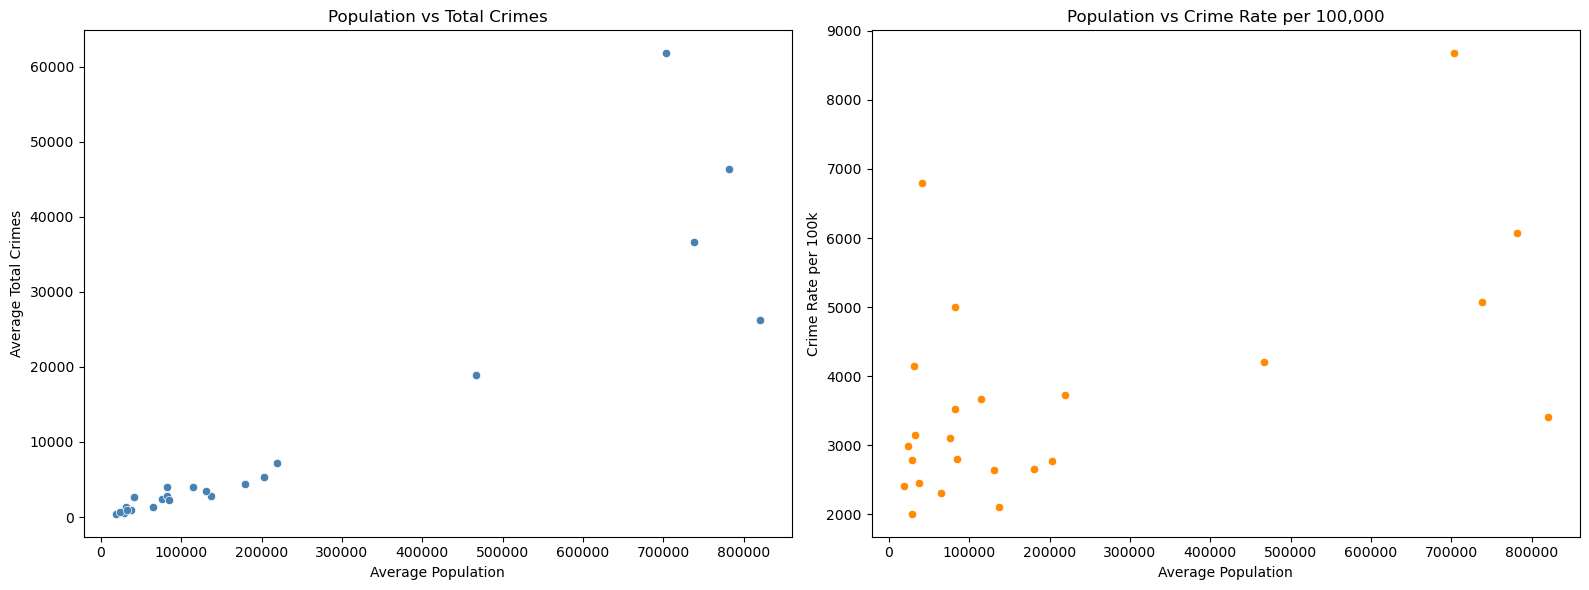

In [9]:
from scipy.stats import pearsonr, linregress

# Group by jurisdiction and calculate averages
pop_crime_df = df.groupby("JURISDICTION").agg({
    "POPULATION": "mean",
    "GRAND TOTAL": "mean",
    "OVERALL CRIME RATE PER 100,000 PEOPLE": "mean"
}).reset_index()

# Pearson correlations
corr_total, _ = pearsonr(pop_crime_df["POPULATION"], pop_crime_df["GRAND TOTAL"])
corr_rate, _ = pearsonr(pop_crime_df["POPULATION"], pop_crime_df["OVERALL CRIME RATE PER 100,000 PEOPLE"])

print(f"📈 Correlation: Population vs Total Crime = {corr_total:.2f}")
print(f"📊 Correlation: Population vs Crime Rate = {corr_rate:.2f}")

# Scatterplots
plt.figure(figsize=(16, 6))

# Total crimes vs population
plt.subplot(1, 2, 1)
sns.scatterplot(data=pop_crime_df, x="POPULATION", y="GRAND TOTAL", color="steelblue")
plt.title("Population vs Total Crimes")
plt.xlabel("Average Population")
plt.ylabel("Average Total Crimes")

# Crime rate vs population
plt.subplot(1, 2, 2)
sns.scatterplot(data=pop_crime_df, x="POPULATION", y="OVERALL CRIME RATE PER 100,000 PEOPLE", color="darkorange")
plt.title("Population vs Crime Rate per 100,000")
plt.xlabel("Average Population")
plt.ylabel("Crime Rate per 100k")

plt.tight_layout()
plt.show()


### 📊 Population Correlation Analysis: Does Population Size Drive Crime Rates?

The relationship between population size and crime rates reveals **two distinct patterns** that challenge the assumption that larger populations automatically mean higher crime rates:

- 📈 **Population vs Total Crime (Strong Positive Correlation):**
    The left plot shows a **clear positive relationship** between population size and total number of crimes. Larger jurisdictions naturally experience more total crimes simply due to having more people. This relationship appears **nearly linear**, with jurisdictions over 700,000 people reporting around **60,000+ total crimes annually**, while smaller jurisdictions (under 100,000) typically see fewer than **5,000 total crimes**.

- 📊 **Population vs Crime Rate per 100k (Weak/No Correlation):**
    The right plot tells a **fundamentally different story**. When controlling for population size by examining crime rates per 100,000 people, there is **no clear correlation** between population size and crime intensity. Crime rates vary widely across all population sizes, ranging from approximately **2,000 to 8,500 crimes per 100k people** regardless of jurisdiction size.

- 🎯 **Key Insight - Population Density vs Crime Intensity:**
    Some of the **highest crime rates** (8,000+ per 100k) actually occur in **medium-sized jurisdictions** (around 700,000 people), not the largest ones. Meanwhile, several large jurisdictions show **moderate crime rates** (3,000-4,000 per 100k), suggesting that **population size alone does not determine crime intensity**.

📌 **Conclusion:**
Population size is a **strong predictor of total crime volume** but a **poor predictor of crime rates**. This suggests that crime intensity is driven by factors beyond population size—such as socioeconomic conditions, law enforcement resources, urban planning, and community programs. **Larger populations do not necessarily mean more dangerous communities** when accounting for population density.

## 📈 Crime Rate Changes Over Time

In this section, we analyze how different types of crimes have changed in terms of rate (per 100,000 people) across Maryland from 1975 to 2020. We calculate:

- Yearly percent changes for each crime type.
- Cumulative trends to identify long-term patterns.
- Line plots for each crime to visualize volatility and growth.


In [10]:
# List of crime rate percent change columns
rate_change_cols = [
    'MURDER  RATE PERCENT CHANGE PER 100,000 PEOPLE',
    'RAPE RATE PERCENT CHANGE PER 100,000 PEOPLE',
    'ROBBERY RATE PERCENT CHANGE PER 100,000 PEOPLE',
    'AGG. ASSAULT  RATE PERCENT CHANGE PER 100,000 PEOPLE',
    'B & E RATE PERCENT CHANGE PER 100,000 PEOPLE',
    'LARCENY THEFT  RATE PERCENT CHANGE PER 100,000 PEOPLE',
    'M/V THEFT  RATE PERCENT CHANGE PER 100,000 PEOPLE'
]

# Clean column names for plotting
clean_names = {
    col: col.split(" RATE")[0].title() for col in rate_change_cols
}


### 🔄 Aggregating Percent Change by Year

We'll now group the dataset by `YEAR` and calculate the **mean percent change** for each crime type across all jurisdictions. This gives us a statewide view of how each crime rate evolved annually.


In [11]:
# Group by year and calculate average percent change across jurisdictions
yearly_changes = df.groupby("YEAR")[rate_change_cols].mean().reset_index()
yearly_changes.rename(columns=clean_names, inplace=True)

# Compute cumulative sum for each cleaned column
for col in clean_names.values():  
    base = yearly_changes[col].iloc[0]
    yearly_changes[col + '_CUM'] = yearly_changes[col].cumsum()

yearly_changes.head()


,YEAR,Murder,Rape,Robbery,Agg. Assault,B & E,Larceny Theft,M/V Theft,Murder _CUM,Rape_CUM,Robbery_CUM,Agg. Assault _CUM,B & E_CUM,Larceny Theft _CUM,M/V Theft _CUM
0,1975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1976,40.962500,60.066667,-17.800000,4.333333,-3.287500,0.554167,-14.216667,40.962500,60.066667,-17.800000,4.333333,-3.287500,0.554167,-14.216667
2,1977,26.329167,29.008333,-1.754167,9.841667,-3.920833,-5.050000,17.462500,67.291667,89.075000,-19.554167,14.175000,-7.208333,-4.495833,3.245833
3,1978,91.875000,-1.666667,21.375000,10.312500,-1.766667,1.229167,13.445833,159.166667,87.408333,1.820833,24.487500,-8.975000,-3.266667,16.691667
4,1979,81.670833,109.854167,67.570833,22.283333,7.870833,16.054167,13.562500,240.837500,197.262500,69.391667,46.770833,-1.104167,12.787500,30.254167


### 📊 Cumulative Crime Rate Percent Changes (1975–2020)

This line chart shows how each crime type’s rate changed cumulatively across Maryland over the years. It reveals long-term trends and highlights the most dramatic shifts.


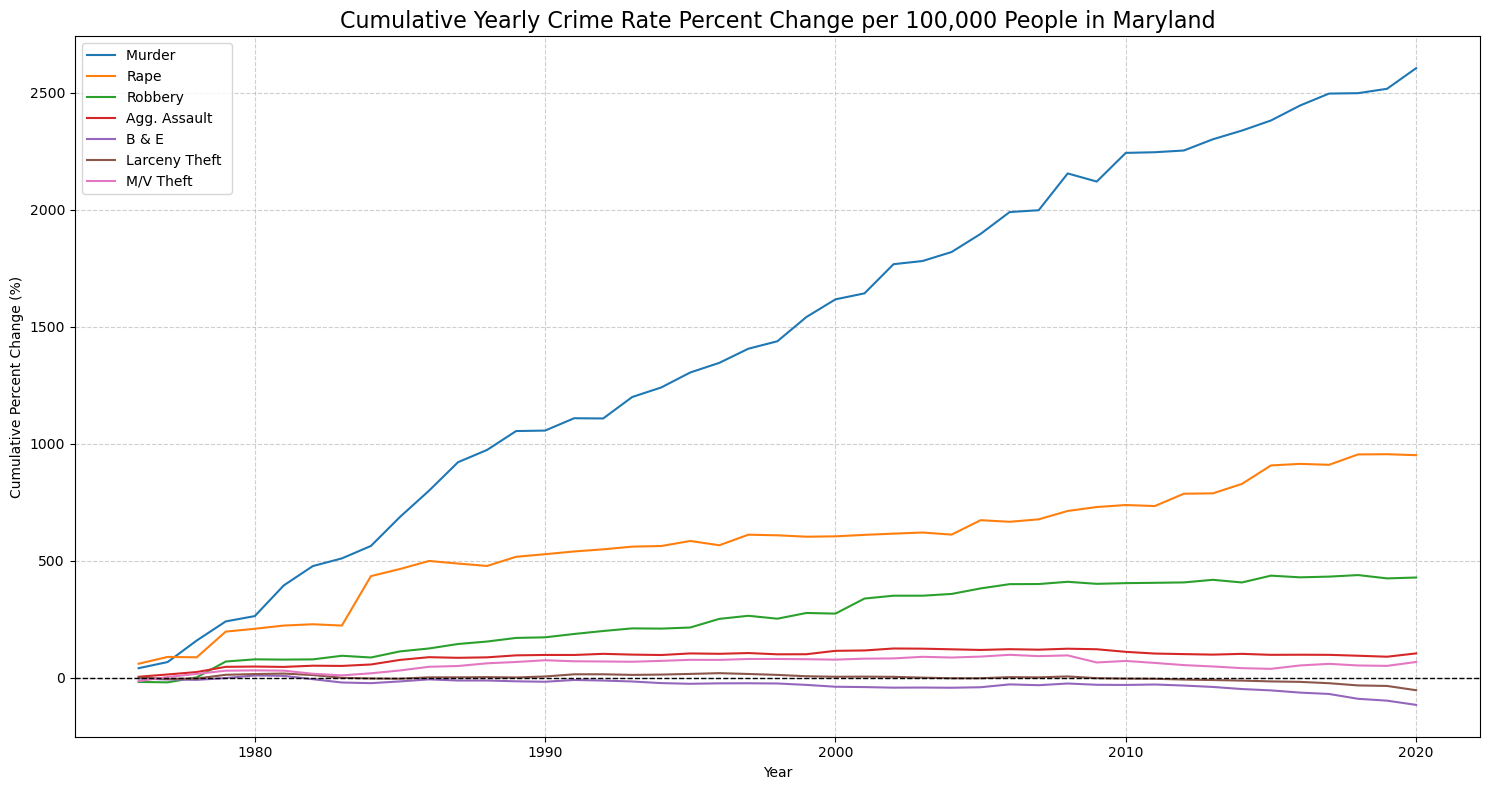

In [12]:
plt.figure(figsize=(15, 8))
for col in clean_names.values():
    plt.plot(yearly_changes["YEAR"], yearly_changes[col+'_CUM'], label=col)

plt.title("Cumulative Yearly Crime Rate Percent Change per 100,000 People in Maryland", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Cumulative Percent Change (%)")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 🔄 Yearly Crime Rate Percent Changes (Volatility View)

This plot displays the year-over-year percent change in crime rates, helping us understand **volatility** and sudden spikes or drops.


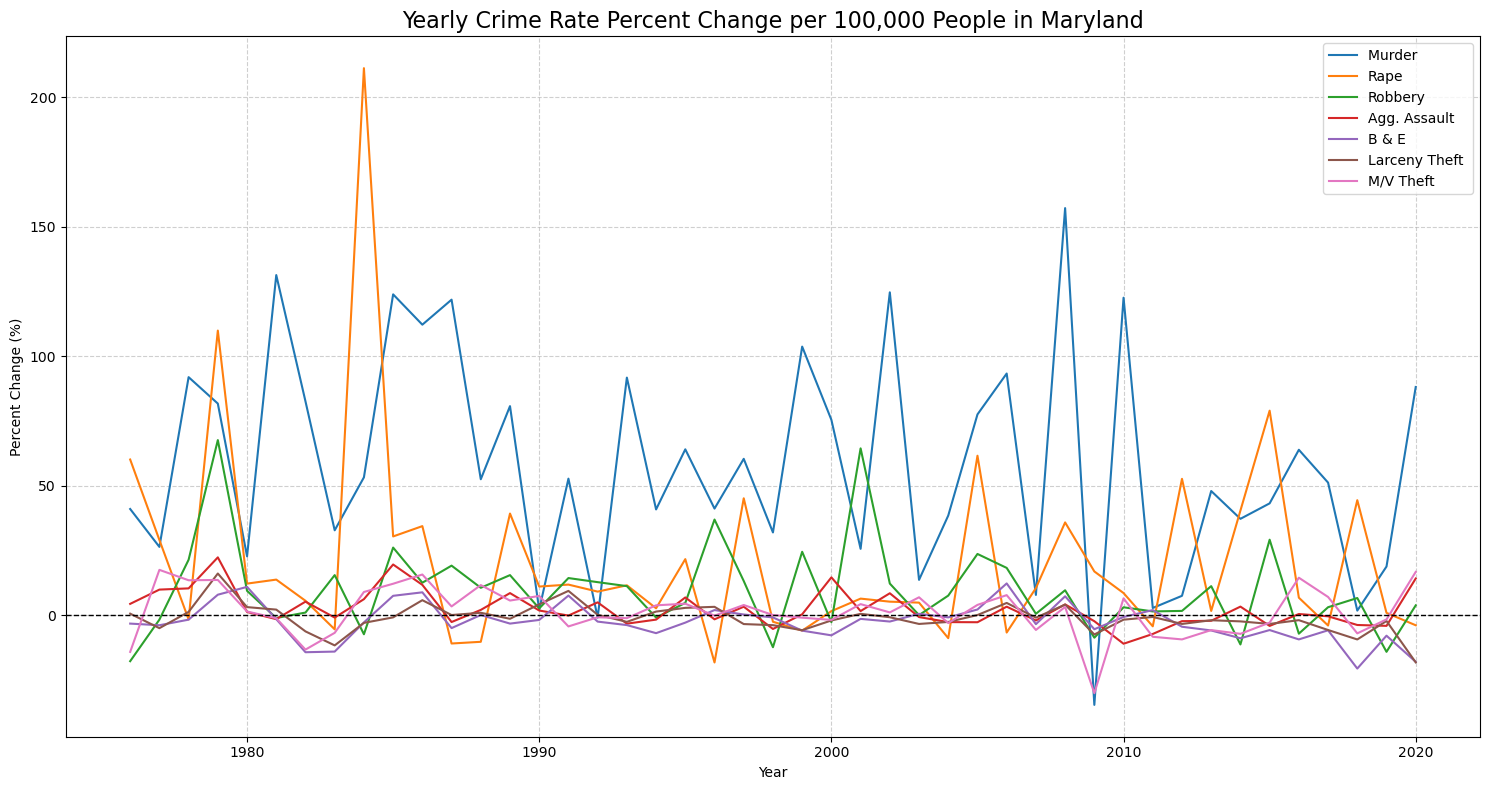

In [13]:
plt.figure(figsize=(15, 8))
for col in clean_names.values():
    plt.plot(yearly_changes["YEAR"], yearly_changes[col], label=col)

plt.title("Yearly Crime Rate Percent Change per 100,000 People in Maryland", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Percent Change (%)")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 📉 Crime Type Trends: Individual Plots

Now let’s explore individual trends for each crime type using subplots. This helps us compare behavior across time and spot outliers more easily.


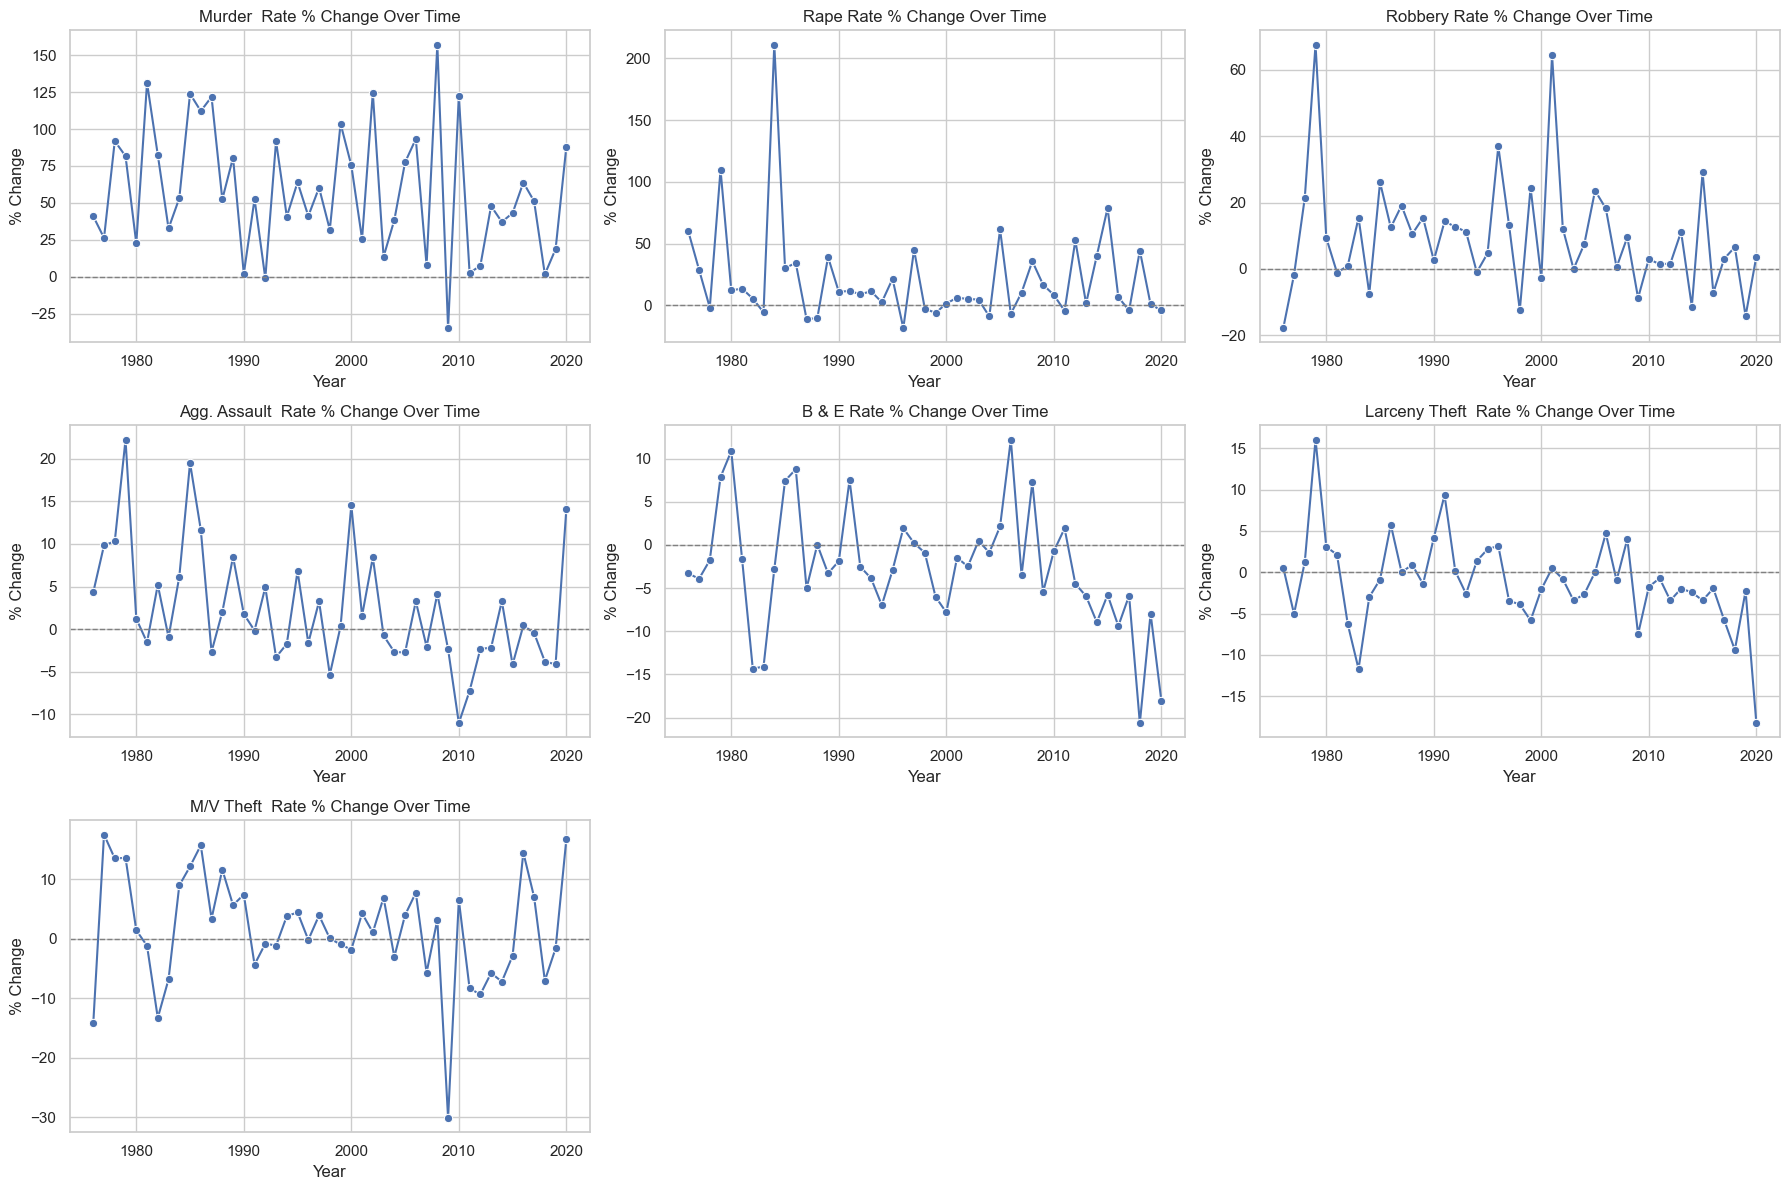

In [14]:
# Set plot style
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 10})

# Number of plots
num_crimes = len(clean_names)
cols = 3  # plots per row
rows = -(-num_crimes // cols)  # ceiling division

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 4))
axes = axes.flatten()

# Plot each crime's rate change over time
for i, (col, clean_name) in enumerate(clean_names.items()):
    ax = axes[i]
    sns.lineplot(
        data=yearly_changes,
        x="YEAR",
        y=clean_name,
        marker="o",
        ax=ax
    )
    ax.set_title(f"{clean_name} Rate % Change Over Time")
    ax.set_xlabel("Year")
    ax.set_ylabel("% Change")
    ax.axhline(0, color="gray", linestyle="--", linewidth=1)  # Reference line at 0

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### 📊 Crime Rate Changes Analysis: Which Crimes Show the Most Dramatic Shifts?

The analysis of crime rate percent changes over time in Maryland reveals **stark differences** in how various crime types have evolved, with some showing dramatic increases while others remain relatively stable:

- 🔺 **Murder - Most Dramatic Increase:**
    Murder rates show the **most significant and sustained increase**, with cumulative growth reaching over **2,500%** by 2020. The year-over-year changes are highly volatile, with spikes exceeding **+150%** in some years (notably around 1980, 2005, and 2015). This represents the **most concerning trend** in the dataset, though it's important to note that murder starts from a very low baseline rate.

- 🔺 **Rape - Second Highest Increase:**
    Rape rates demonstrate the **second-largest cumulative increase**, reaching approximately **950%** by 2020. The growth pattern shows steady increases from the 1980s onward, with particularly notable spikes around 1985 (+200%) and more moderate but consistent growth in recent decades.

- 📈 **Robbery - Moderate Upward Trend:**
    Robbery shows a **moderate cumulative increase** of around **430%** over the time period. The individual year changes are highly volatile, with dramatic spikes of **+65%** and dips of **-20%**, but the overall trajectory trends upward, particularly accelerating after 2000.

- ⚖️ **Property Crimes - Relatively Stable:**
    **Aggravated Assault, B&E (Breaking & Entering), Larceny Theft, and M/V Theft** all show **much smaller cumulative changes** (under 150%), indicating these crime types have remained relatively stable compared to violent crimes. Their year-over-year fluctuations are more moderate, typically ranging between **-15% to +20%**.

- 📉 **Recent Trends (2010-2020):**
    Most crime types show **increased volatility** in recent years, with B&E showing a notable **decline** of nearly **-20%** around 2015, while Murder and Rape continue their **upward trajectories**.

📌 **Conclusion:**
**Violent crimes (Murder, Rape, Robbery)** have experienced the most significant increases over the 45-year period, while **property crimes remain relatively stable**. The dramatic rise in murder rates is particularly concerning and warrants focused intervention. However, the high volatility in year-over-year changes suggests that crime rates are influenced by complex factors that can cause rapid shifts, emphasizing the need for **sustained, long-term crime prevention strategies** rather than reactive approaches.

## 📍 Crime Hotspots Analysis

This section identifies **crime-prone jurisdictions** by combining both **total reported crimes** and **average crime rate per 100,000 people**. A composite score is used to create a **Priority Index** which balances volume and intensity of crime.


In [17]:
# Group by jurisdiction
hotspot_df = df.groupby("JURISDICTION").agg({
    "GRAND TOTAL": "sum",
    "OVERALL CRIME RATE PER 100,000 PEOPLE": "mean",
    "POPULATION": "mean"
}).reset_index()

# Rename for clarity
hotspot_df.rename(columns={
    "GRAND TOTAL": "Total Crimes (All Years)",
    "OVERALL CRIME RATE PER 100,000 PEOPLE": "Avg Crime Rate per 100k",
    "POPULATION": "Avg Population"
}, inplace=True)

# Create composite score: average of rank percentages
hotspot_df['PRIORITY_INDEX'] = (
    hotspot_df['Total Crimes (All Years)'].rank(pct=True) * 0.5 +
    hotspot_df['Avg Crime Rate per 100k'].rank(pct=True) * 0.5
)

# Sort by priority index
hotspot_df = hotspot_df.sort_values(by="PRIORITY_INDEX", ascending=False)

In [18]:
top_hotspots = hotspot_df.head(10)
print(top_hotspots)

              JURISDICTION  Total Crimes (All Years)  Avg Crime Rate per 100k  \
2           Baltimore City                   2842811              8673.347826   
16  Prince George's County                   2132933              6067.378261   
3         Baltimore County                   1688857              5076.184783   
1      Anne Arundel County                    871803              4201.091304   
22         Wicomico County                    185137              5000.923913   
13           Howard County                    331924              3735.808696   
15       Montgomery County                   1208032              3414.739130   
23        Worcester County                    121286              6799.223913   
8           Charles County                    184292              3675.395652   
7             Cecil County                    131204              3525.921739   

    Avg Population  PRIORITY_INDEX  
2    703032.391304        1.000000  
16   782362.195652        0.937500

### 🔥 Top 10 Hotspots by Total Crime Volume


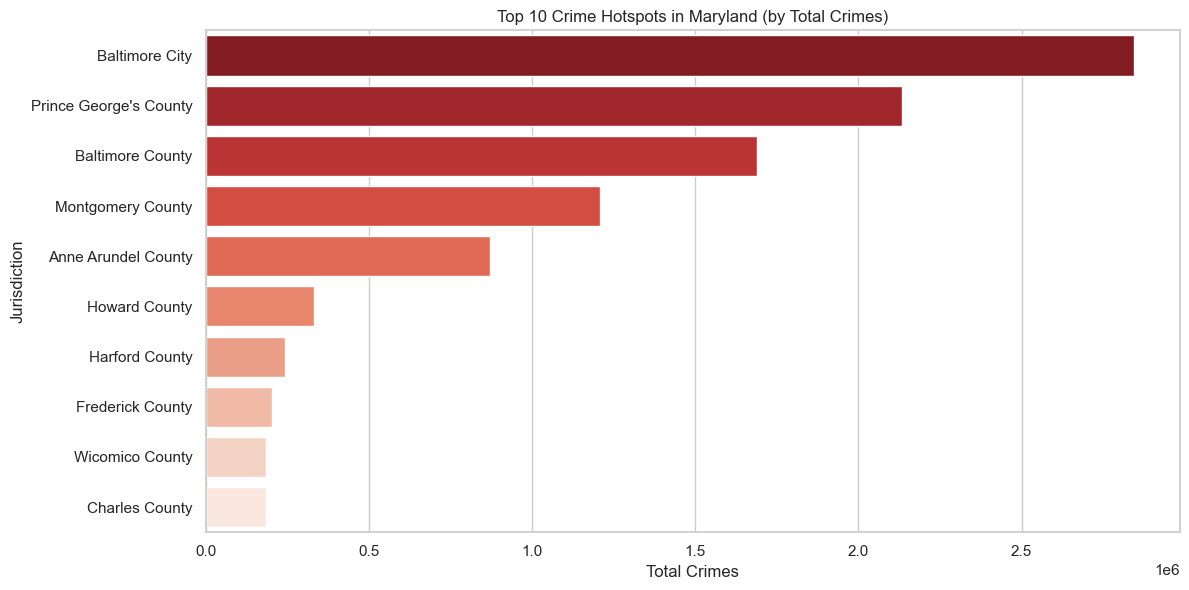

In [19]:
total_crime_hotspots = hotspot_df.sort_values(by="Total Crimes (All Years)", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=total_crime_hotspots, x="Total Crimes (All Years)", y="JURISDICTION", palette="Reds_r")
plt.title("Top 10 Crime Hotspots in Maryland (by Total Crimes)")
plt.xlabel("Total Crimes")
plt.ylabel("Jurisdiction")
plt.tight_layout()
plt.show()


### 📈 Top 10 Jurisdictions by Crime Rate Intensity


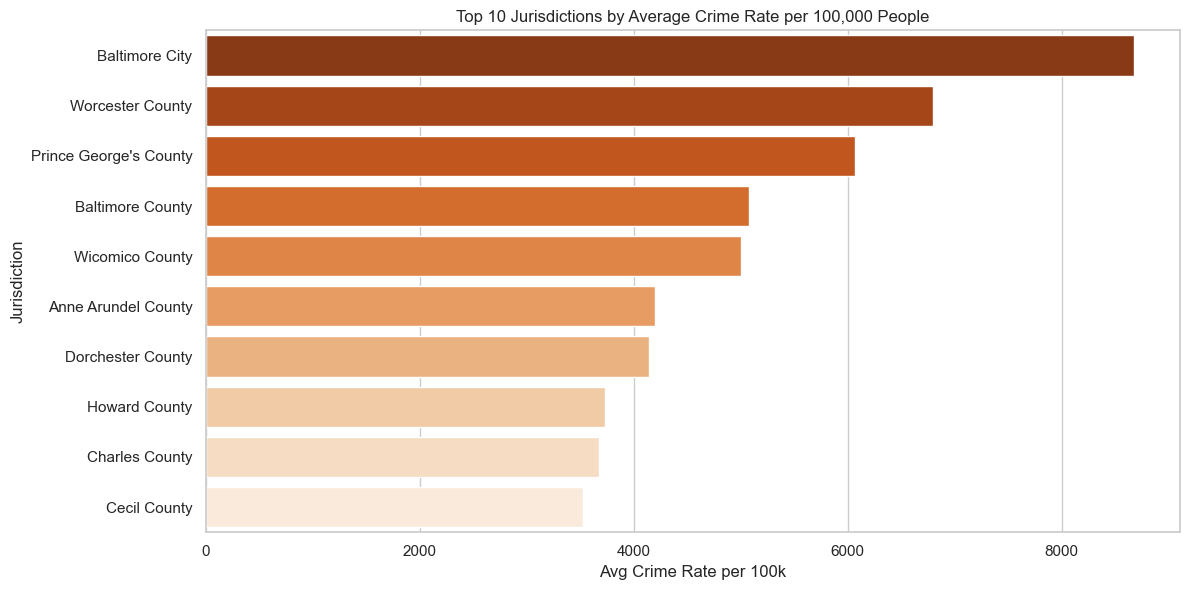

In [20]:
crime_rate_hotspots = hotspot_df.sort_values(by="Avg Crime Rate per 100k", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=crime_rate_hotspots, x="Avg Crime Rate per 100k", y="JURISDICTION", palette="Oranges_r")
plt.title("Top 10 Jurisdictions by Average Crime Rate per 100,000 People")
plt.xlabel("Avg Crime Rate per 100k")
plt.ylabel("Jurisdiction")
plt.tight_layout()
plt.show()

### 📊 Crime Hotspots Analysis: Priority Areas for Resource Allocation

The comprehensive analysis of both crime volume and crime rate data reveals **distinct hotspot patterns** requiring differentiated resource allocation strategies across Maryland jurisdictions:

- 🚨 **Tier 1 Critical Priority - Baltimore City (Priority Index: 1.00):**
    **Baltimore City** is the **undisputed top priority**, dominating both visualizations with the highest crime rate (**8,673 per 100k**) and largest total crime volume (**2.84 million crimes**). This represents a **public safety crisis** requiring immediate, comprehensive intervention including increased police presence, community programs, economic development, and social services. The city's crime rate is **27% higher** than the second-highest jurisdiction.

- 🔺 **Tier 2 High Priority Areas (Priority Index: 0.71-0.94):**
    **Prince George's County** (Priority Index: 0.94) emerges as the **second-highest priority** with **2.13 million total crimes** and **6,067 per 100k** crime rate, making it both a high-volume and high-intensity area. **Baltimore County** (Priority Index: 0.90) follows with **1.69 million total crimes** despite a moderate rate of **5,076 per 100k**. **Worcester County** (Priority Index: 0.71) presents a unique challenge with the **second-highest crime rate** (**6,799 per 100k**) but appears only in the crime rate chart due to its smaller population (**41,528 average**) - this suggests **concentrated criminal activity** requiring specialized rural/small community interventions.

- 📍 **Tier 3 Moderate Priority Areas (Priority Index: 0.73-0.81):**
    **Anne Arundel County** (Priority Index: 0.81) shows significant volume (**871,803 total crimes**) with a **4,201 per 100k** rate. **Montgomery County** (Priority Index: 0.73) appears prominently in the total crimes chart (**1.21 million crimes**) but has a relatively low crime rate (**3,415 per 100k**), indicating that its large population (**820,118 average**) drives absolute numbers rather than crime intensity.

- ⚖️ **Tier 4 Targeted Intervention Areas (Priority Index: 0.75):**
    **Wicomico County** and **Howard County** (both Priority Index: 0.75) represent contrasting profiles requiring different approaches. Wicomico has a **high crime rate** (**5,001 per 100k**) but low volume due to small population, while Howard has **moderate rates** (**3,736 per 100k**) but higher absolute numbers (**331,924 total crimes**).

- 📉 **Tier 5 Maintenance Priority (Priority Index: 0.58-0.65):**
    **Charles County** (Priority Index: 0.65) and **Cecil County** (Priority Index: 0.58) show **lower crime rates** (3,675 and 3,526 per 100k respectively) and smaller volumes, suggesting **effective current strategies** that should be maintained while monitoring for changes.

- 🔍 **Notable Observations from Visual Analysis:**
    The charts reveal that **Dorchester County** appears in the top 10 by crime rate but not in the priority index top 10, suggesting it may warrant monitoring. Several jurisdictions like **Harford and Frederick Counties** appear in the total crimes chart but not the crime rate chart, indicating their crime is primarily population-driven rather than intensity-driven.

📌 **Strategic Resource Allocation Recommendations:**
**Baltimore City** requires **emergency-level intervention** with maximum resource deployment. **Prince George's County** needs **comprehensive urban crime strategies**, while **Worcester County** requires **specialized rural crime prevention**. **Baltimore and Montgomery Counties** need **population-scaled resource allocation**, and smaller jurisdictions should focus on **targeted prevention programs**. This data-driven tiered approach ensures optimal allocation of limited law enforcement resources based on both crime severity and community impact.

## 💾 Export Processed Data to CSV

Export all processed dataframes for visualization and dashboarding in Power BI.


In [40]:
# Export the processed dataframes to import in power bi
statewide_df.to_csv("statewide_crime_trend.csv", index=False)
yearly_crime_totals.to_csv("crime_distribution.csv", index=False)
jurisdiction_crime_sorted.to_csv("jurisdiction_crime_rates.csv", index=False)
pop_crime_df.to_csv("population_vs_crime.csv", index=False)
yearly_changes.to_csv("crime_rate_changes.csv", index=False)
hotspot_df.to_csv("crime_hotspots.csv", index=False)
